In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter

In [5]:
erYouVotes = 0
erRivalVotes: 0
erUndecidedVotes = 0

pagYouVotes = 0
pagRivalVotes: 0
pagUndecidedVotes = 0

In [6]:
def CalculateProbablity(NodeCount, EdgeCount):
    return EdgeCount / (NodeCount * (NodeCount-1) / 2)

In [7]:
def GenerateErdosRenyiGraph(NodeCount, EdgeCount):
    prob = CalculateProbablity(NodeCount, EdgeCount)
    network = nx.erdos_renyi_graph(NodeCount, prob)
    return network

In [8]:
def GeneratePreferentialAttachmentGraph(NodeCount, OutDegree):
    network = nx.barabasi_albert_graph(NodeCount, OutDegree)
    return network

In [9]:
def FillNetworkData(network):
    for node in network.nodes():
        last_digit = node % 10
        if last_digit in [0, 2, 4, 6]:
            network.nodes[node]['vote'] = 'You'
        elif last_digit in [1, 3, 5, 7]:
            network.nodes[node]['vote'] = 'Rival'
        else:
            network.nodes[node]['vote'] = 'Undecided'
    return network

In [10]:
def CountVotes(network):
    youVotes = 0
    rivalVotes = 0
    undecidedVotes = 0
    for node in network.nodes():
        if network.nodes[node]['vote'] == 'You':
            youVotes += 1
        elif network.nodes[node]['vote'] == 'Rival':
            rivalVotes += 1
        else:
            undecidedVotes += 1
    return youVotes, rivalVotes, undecidedVotes

In [11]:
erNet = GenerateErdosRenyiGraph(10000, 10000)
paNet = GeneratePreferentialAttachmentGraph(10000, 10)

erNet = FillNetworkData(erNet)
paNet = FillNetworkData(paNet)

In [12]:
erYouVotes, erRivalVotes, erUndecidedVotes = CountVotes(erNet)
print(
    f"ER Net ==> You : {erYouVotes} ,Rival : {erRivalVotes}, Undecided : {erUndecidedVotes}")

ER Net ==> You : 4000 ,Rival : 4000, Undecided : 2000


In [13]:
pagYouVotes, pagRivalVotes, pagUndecidedVotes = CountVotes(paNet)
print(
    f"PA Net ==> You : {pagYouVotes} ,Rival : {pagRivalVotes}, Undecided : {pagUndecidedVotes}")

PA Net ==> You : 4000 ,Rival : 4000, Undecided : 2000


In [14]:
def ApplyFriendsEffct(network):
    for electtionDay in range(1, 11):
        newYou = 0
        newRival = 0
        for node in network.nodes():
            if network.nodes[node]['vote'] == 'Undecided':
                newYou = 0
                newRival = 0
                for neib in network.neighbors(node):
                    if network.nodes[neib]['vote'] == 'You':
                        newYou += 1
                    elif network.nodes[neib]['vote'] == 'Rival':
                        newRival += 1

                if newYou > newRival:
                    network.nodes[node]['vote'] = 'You'
                elif newYou < newRival:
                    network.nodes[node]['vote'] = 'Rival'
                else:
                    if electtionDay % 2 == 1:
                        network.nodes[node]['vote'] = 'You'
                    else:
                        network.nodes[node]['vote'] = 'Rival'

    return network

In [15]:
erNet = ApplyFriendsEffct(erNet)
erYouVotes, erRivalVotes, erUndecidedVotes = CountVotes(erNet)
print(
    f"ER Net ==> You : {erYouVotes} ,Rival : {erRivalVotes}, Undecided : {erUndecidedVotes}")

paNet = ApplyFriendsEffct(paNet)
pagYouVotes, pagRivalVotes, pagUndecidedVotes = CountVotes(paNet)
print(
    f"PA Net ==> You : {pagYouVotes} ,Rival : {pagRivalVotes}, Undecided : {pagUndecidedVotes}")

ER Net ==> You : 5376 ,Rival : 4624, Undecided : 0
PA Net ==> You : 5152 ,Rival : 4848, Undecided : 0


In [16]:
erMargin = erYouVotes - erRivalVotes
if erMargin > 0:
    print(f"Winner in Erdos renyi Network : You  Margin :{erMargin}")
elif erMargin < 0:
    print(f"Winner in Erdos renyi Network : Rival  Margin: {-erMargin}")
else:
    print("Winner in Erdos renyi Network : Nobody")

Winner in Erdos renyi Network : You  Margin :752


In [17]:
paMargin = pagYouVotes - pagRivalVotes
if paMargin > 0:
    print(f"Winner in preferential Network : You  Margin :{paMargin}")
elif erMargin < 0:
    print(f"Winner in preferential Network : Rival  Margin: {-paMargin}")
else:
    print("Winner in preferential Network : Nobody")

Winner in preferential Network : You  Margin :304


In [18]:
def ApplyLiveStreamEffect(network, spend):
    effect = int(spend / 100)
    firstNode = 3000
    lastNode = firstNode+effect

    node = firstNode
    while node < lastNode:
        network.nodes[node]['vote'] = 'You'
        node = node+1
    return network

In [19]:
erNet = GenerateErdosRenyiGraph(10000, 10000)
paNet = GeneratePreferentialAttachmentGraph(10000, 10)

erNet = FillNetworkData(erNet)
paNet = FillNetworkData(paNet)

erYouVotes, erRivalVotes, erUndecidedVotes = CountVotes(erNet)
print(
    f"ER Net  ==> You : {erYouVotes} ,Rival : {erRivalVotes}, Undecided : {erUndecidedVotes}")

ER Net  ==> You : 4000 ,Rival : 4000, Undecided : 2000


In [28]:
def Exp(network, networkName):
    min = 1000
    max = 10000
    step = 1000
    s = min
    while s <= max:
        YouVotes1, RivalVotes1, UndecidedVotes1 = CountVotes(network)
        network = ApplyLiveStreamEffect(network, s)
        for day in range(1, 11):
            network = ApplyFriendsEffct(network)
            YouVotes, RivalVotes, UndecidedVotes = CountVotes(network)
            print(f"{networkName} Net day({day})  spend=({s}) ==> You : {YouVotes} ,Rival : {RivalVotes}, Undecided : {UndecidedVotes}")

            if YouVotes1 == YouVotes and RivalVotes1 == RivalVotes and UndecidedVotes1 == UndecidedVotes:
                return s, day-1
            YouVotes1 = YouVotes
            RivalVotes1 = RivalVotes
            UndecidedVotes1 = UndecidedVotes

    s = s+step

In [21]:

s, day = Exp(erNet, "ER")
print(s)
print(day)

ER Net day(1)  spend=(1000) ==> You : 5368 ,Rival : 4632, Undecided : 0
ER Net day(2)  spend=(1000) ==> You : 5368 ,Rival : 4632, Undecided : 0
1000
2


In [22]:

s, day = Exp(paNet, "PA")
print(s)
print(day)

PA Net day(1)  spend=(1000) ==> You : 5183 ,Rival : 4817, Undecided : 0
PA Net day(2)  spend=(1000) ==> You : 5183 ,Rival : 4817, Undecided : 0
1000
2


In [23]:
def ApplyHighRollersEffect(network, spend):
    hCount = spend//100
    highRollers = sorted(
        network.nodes, key=lambda x: (-network.degree(x), x))[-hCount:]
    for node in highRollers:
        network.nodes[node]['vote'] = 'You'
    return network

In [29]:
def ExpHighRollers(network, networkName):
    min = 1000
    max = 10000
    step = 1000
    s = min
    while s <= max:
        YouVotes1, RivalVotes1, UndecidedVotes1 = CountVotes(network)
        network = ApplyLiveStreamEffect(network, s)
        for day in range(1, 11):
            network = ApplyFriendsEffct(network)
            YouVotes, RivalVotes, UndecidedVotes = CountVotes(network)
            print(f"{networkName} Net day({day})  spend=({s}) ==> You : {YouVotes} ,Rival : {RivalVotes}, Undecided : {UndecidedVotes}")
            if YouVotes1 == YouVotes and RivalVotes1 == RivalVotes and UndecidedVotes1 == UndecidedVotes:
                return s, day-1
            YouVotes1 = YouVotes
            RivalVotes1 = RivalVotes
            UndecidedVotes1 = UndecidedVotes

    s = s+step

In [30]:
erNet = GenerateErdosRenyiGraph(10000, 10000)
erNet = FillNetworkData(erNet)
erNet = ApplyHighRollersEffect(erNet, 1000)
s, day = ExpHighRollers(erNet, "ER")
print(s)
print(day)

ER Net day(1)  spend=(1000) ==> You : 5346 ,Rival : 4654, Undecided : 0
ER Net day(2)  spend=(1000) ==> You : 5346 ,Rival : 4654, Undecided : 0
1000
1


In [31]:
paNet = GeneratePreferentialAttachmentGraph(10000, 10)
paNet = FillNetworkData(paNet)
paNet = ApplyHighRollersEffect(paNet, 1000)
s, day = ExpHighRollers(paNet, "PR")
print(s)
print(day)

PR Net day(1)  spend=(1000) ==> You : 5197 ,Rival : 4803, Undecided : 0
PR Net day(2)  spend=(1000) ==> You : 5197 ,Rival : 4803, Undecided : 0
1000
1


In [43]:
T = [1, 1, 1, 1, 1, 4, 1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 4, 0, 1, 4, 0, 1, 1, 1,
     4, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 4, 1, 1, 4, 1, 4, 0, 1, 0, 1, 1,
     1, 0, 4, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 4, 0, 4, 0, 0, 1, 1, 1,
     4, 0, 4, 0]

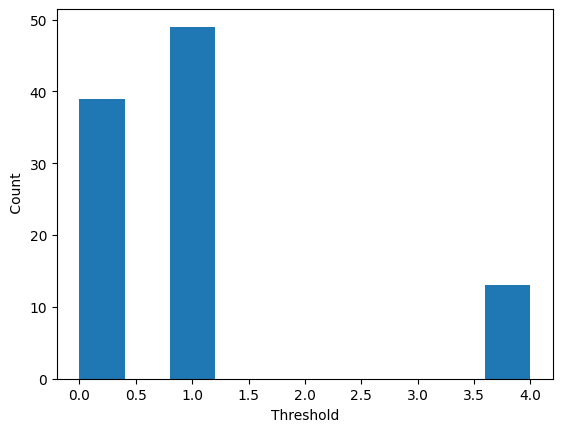

In [44]:
plt.xlabel("Threshold")
plt.ylabel(" Count")
plt.hist(T)
plt.show()

{0: 39, 1: 49, 4: 13}
{0: 39, 1: 88, 4: 101}


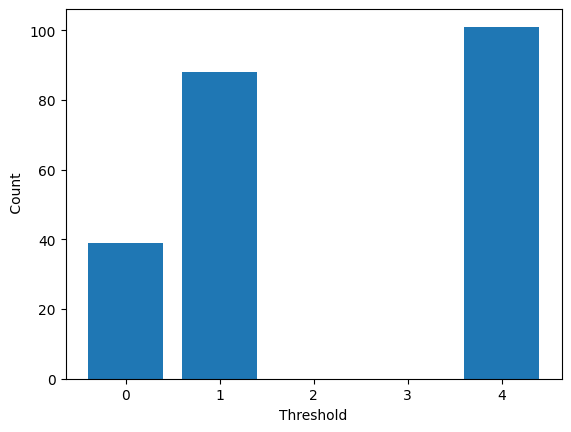

In [63]:

# Use the Counter class to count occurrences of each unique threshold value
nHist = Counter(T)
x =dict( sorted(nHist.items(), key=itemgetter(0)))
cnHist=dict()
cs=0
for node in x.keys():
    cnHist[node]=cs+x[node]
    cs=cs+x[node]
print(x)
print(cnHist)

plt.xlabel("Threshold")
plt.ylabel(" Count")
plt.bar(cnHist.keys(),cnHist.values())
plt.show()